# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2020

## Project 1 - The Trapped Knight
Due Wednesday, February 19

### Description

In this project, you will write a computer code to generate a particular sequence of numbers described in the following YouTube video: [The Trapped Knight](https://www.youtube.com/watch?v=RGQe8waGJ4w)

Begin by watching the video and make sure you understand exactly how the sequence is generated. Then continue to implement the code in the 3 parts described below.

### Part 1 - Initialize the board

We will store the chess board in a 2d-array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```julia
board = initialize_board(3)
```
the correct output is
```julia
7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Julia uses 1-based indexing, the center square of the array `board` is given by element `board[n+1,n+1]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.

- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [2]:
# Initializes the board on a [-n:n]x[-n:n] domain with spiral numbers
#
# Example: initialize_board(2) returns
# 17 16 15 14 13
# 18  5  4  3 12
# 19  6  1  2 11
# 20  7  8  9 10
# 21 22 23 24 25
#
# Inputs:
#  n     = integer size of board to allocate
# Outputs: 
#  board = 2n+1 x 2n+1 integer array filled with spiral numbers
function initialize_board(n)
    board = zeros(Int64,2n+1,2n+1)
    board[n+1,n+1] = 1
    for i = 1:n
        for r = 1:2i-1
            board[n+1+i-1,n+1-i+r+1]= board[n+1+i-1,n+1-i+1]+r
        end
        
        for u = 1:2i-1
            board[n+i-u,n+i+1]= board[n+i,n+i+1]+u
        end
        
        for l = 1:2i
            board[n-i+1,n+i-l+1]= board[n-i+1,n+i+1]+l
        end
        
        for d = 1:2i
            board[n-i+1+d,n-i+1] =board[n-i+1,n-i+1]+d
        end
    end
    
    for k = 2: 2n+1
        board[2n+1,k] = board[2n+1,1]+k-1
    end
    return board
end

initialize_board (generic function with 1 method)

In [66]:
initialize_board(2)

5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

In [67]:
initialize_board(3)

7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49

### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

In [13]:
# Simulates the trapped knight walk on a pre-initialized board and returns information about knight walk.
# 
# Inputs: 
#  board    = 2n+1 x 2n+1 integer array filled with spiral numbers
# Outputs: 
#  sequence = integer array containing the sequence of spiral numbers the knight jumped to during walk
#  x_path   = integer array containing the x coordinates of each step of knight walk
#  y_path   = integer array containing the y coordinates of each step of knight walk
function simulate_walk(board)
    n = size(board,1)
    t1= Int64((n+1)/2)
    
    r = Int64((n+1)/2)
    c = Int64((n+1)/2)

    cboard = falses(n,n)
    cboard[r,c] = true

    sequence = [1]
    x_coordinates = [0]
    y_coordinates = [0]
    status = true
    while status == true
        
        n_m_array = [board[r,c] r c]
        
        if Int64(r) + 2 <= n && Int64(c)+1 <= n && cboard[r+2,c+1] == false
            n_m_array = [n_m_array; board[r+2,c+1] (r+2) (c+1)]
        end
        
        if Int64(r) + 2 <= n && Int64(c)-1 >= 1 && cboard[r+2,c-1] == false
            n_m_array = [n_m_array; board[r+2,c-1] (r+2) (c-1)]
        end
        
        if Int64(r) - 2 >= 1 && Int64(c)+1 <=n && cboard[r-2,c+1] == false
            n_m_array = [n_m_array; board[r-2,c+1] (r-2) (c+1)]
        end
        
        if Int64(r) - 2 >= 1 && Int64(c)-1 >= 1 && cboard[r-2,c-1] == false
            n_m_array = [n_m_array; board[r-2,c-1] (r-2) (c-1)]
        end
        
        if Int64(c) + 2 <= n && Int64(r) + 1 <= n  && cboard[r+1,c+2] == false
            n_m_array = [n_m_array; board[r+1,c+2] (r+1) (c+2)]
        end
        
        if Int64(c) + 2 <= n && Int64(r) - 1>=1   && cboard[r-1,c+2] == false
            n_m_array = [n_m_array; board[r-1,c+2] (r-1) (c+2)]
        end
        
        if Int64(c) - 2 >= 1 && Int64(r) + 1 <= n  && cboard[r+1,c-2] == false
            n_m_array = [n_m_array; board[r+1,c-2] (r+1) (c-2)]
        end
        
        if Int64(c) - 2 >=1  && Int64(r)- 1 >= 1 && cboard[r-1,c-2] == false
            n_m_array = [n_m_array; board[r-1,c-2] (r-1) (c-2)]
        end
        

        
        if n_m_array == [board[r,c] r c]
            break
        end
        
        len = size(n_m_array,1)
        min = minimum(n_m_array[2:len,1])

        
        for i = 2:size(n_m_array,1)
            if n_m_array[i,1] == min
                r = n_m_array[i,2]
                c = n_m_array[i,3]
            end
        end
        
        cboard[r,c] = true
        sequence = [sequence;min]
        x_coordinates = [x_coordinates;c-t1]
        y_coordinates = [y_coordinates;r-t1]


    end   
    return sequence, x_coordinates, y_coordinates
end


simulate_walk (generic function with 1 method)

In [14]:
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)

5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]


### Part 3 - Generate the full sequence and plot the path

Finally, use your code to generate the full sequence ($n=100$ is sufficient), output the *last* number, and plot the path by straight lines between all the visited x,y-coordinates.

In [15]:
board = initialize_board(100)
#display(board)
seq100, xs100, ys100 = simulate_walk(board);
println("Sequence = ", seq100)
println("x-coordinates = ", xs100)
println("y-coordinates = ", ys100)

Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14, 29, 32, 15, 12, 27, 24, 45, 20, 23, 44, 41, 18, 35, 38, 19, 16, 33, 30, 53, 26, 47, 22, 43, 70, 21, 40, 17, 34, 13, 28, 25, 46, 75, 42, 69, 104, 37, 62, 95, 58, 55, 86, 51, 48, 77, 114, 73, 108, 151, 68, 103, 64, 67, 36, 39, 66, 63, 96, 59, 56, 87, 52, 49, 78, 115, 74, 71, 106, 149, 102, 99, 140, 61, 94, 31, 54, 85, 50, 79, 116, 161, 76, 113, 72, 107, 150, 201, 146, 65, 98, 139, 60, 93, 90, 129, 176, 125, 82, 119, 164, 217, 160, 111, 154, 205, 264, 331, 200, 101, 142, 97, 138, 187, 92, 89, 128, 175, 84, 81, 118, 163, 216, 159, 110, 153, 204, 105, 148, 199, 144, 147, 100, 141, 190, 137, 186, 91, 130, 57, 88, 127, 174, 83, 80, 117, 162, 215, 112, 109, 152, 203, 262, 329, 198, 195, 252, 143, 192, 249, 188, 135, 132, 179, 234, 297, 230, 123, 120, 165, 218, 279, 214, 157, 208, 267, 334, 263, 330, 259, 196, 253, 318, 191, 248, 313, 244, 133, 180, 235, 298, 177, 126, 173, 122, 167, 220, 281, 350, 277, 158, 155, 206, 265, 202, 261, 328, 197, 2

, 1794, 1965, 2144, 1961, 2140, 2327, 1956, 2135, 1952, 2131, 1948, 1773, 1606, 1299, 1296, 1441, 1594, 1755, 1924, 2101, 2286, 1921, 1588, 1749, 1918, 2095, 2280, 2091, 2276, 2469, 2670, 2271, 2464, 2267, 2078, 1897, 1724, 1721, 1888, 2063, 2246, 1885, 2060, 2243, 2434, 2633, 2840, 2429, 2234, 2047, 1872, 2233, 2046, 2229, 2042, 1863, 1532, 1233, 1094, 963, 960, 1085, 1218, 1359, 1508, 1665, 1830, 2003, 2184, 2373, 2000, 1823, 1996, 2177, 2366, 2563, 2768, 2363, 2560, 2765, 2978, 3199, 2760, 2353, 2548, 2751, 2962, 3181, 2746, 2343, 2538, 2339, 2148, 2335, 1964, 2143, 2330, 2525, 2138, 2325, 2520, 2321, 1950, 2129, 1946, 1607, 1448, 1297, 1442, 1595, 1756, 1925, 1592, 1753, 1922, 2099, 2284, 2477, 2096, 2281, 2474, 2675, 2884, 3101, 2880, 2467, 2084]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1, 3, 2, 0, 2, 3, 1, -1, -2, 0, -2, -3, -2, -1, -3, -2, -1, 1, 3, 4, 3, 1, -1, -3, -4, -2, -3, -2, 0, 2, 3, 2, 0, -2, -3, -4, -5, -3, -1, 1, 3, 4, 5, 4, 2, 0, -2, -4, -5, -6, -4, -5, -3

In [22]:
size(xs100)

(2016,)

In [25]:
xs100[1:5]

5-element Array{Int64,1}:
  0
  2
  1
 -1
  1

In [20]:
println("The last number of the sequence is ", seq100[end],".")

The last number of the sequence is 2084.


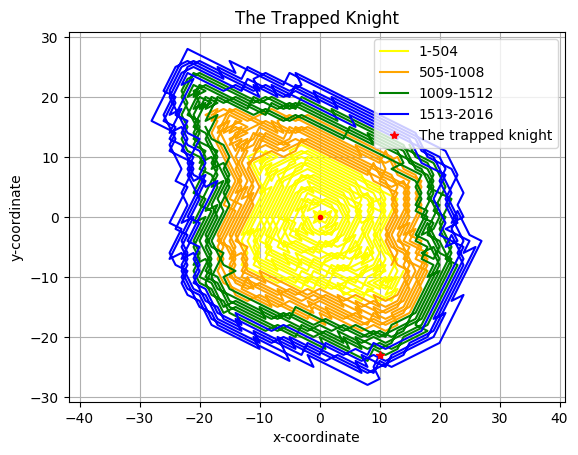

PyObject Text(0.5, 1.0, 'The Trapped Knight')

In [41]:
using PyPlot
x1 = xs100[1:504]
y1 = ys100[1:504]
x2 = xs100[505:1008]
y2 = ys100[505:1008]
x3 = xs100[1009:1512]
y3 = ys100[1009:1512]
x4 = xs100[1513:2016]
y4 = ys100[1513:2016]
xlast = xs100[end]
ylast = ys100[end]
plot(x1,y1,color = "yellow")
plot(x2,y2,color = "orange")
plot(x3,y3,color = "green")
plot(x4,y4,color = "blue")
plot(xlast,ylast,color="red","r*")
plot(0,0,color = "red",".")
legend(("1-504","505-1008","1009-1512","1513-2016","The trapped knight"))
axis("equal")
grid(true)
xlabel("x-coordinate")
ylabel("y-coordinate")
title("The Trapped Knight")